In [21]:
import pandas as pd
import json
import ast
import seaborn as sns
import matplotlib.pyplot as plt;
import numpy as np
from pylab import *
import matplotlib.patches as mpatches
import plotly
import plotly.graph_objects as go

# Load Data

In [2]:
Step1_Raw_Data_df =  pd.read_csv("Step1_Raw_Data.csv",index_col=0)
Step2_Popular_Rules_df = pd.read_csv("Step2_Popular_Rules.csv",index_col=0)
Step3_IoT_Rules_df = pd.read_csv("Step3_IoT_Rules.csv",index_col=0)
Step4_Single_Trigger_IoT_Rules_df = pd.read_csv("Step4_Single_Trigger_IoT_Rules.csv",index_col=0)


with open('service_with_categories.json', 'r') as fp:
    service_with_categories = json.load(fp)
with open('categories_with_service.json', 'r') as fp:
    categories_with_service = json.load(fp)

# Installation Distribution (Fig. 2)

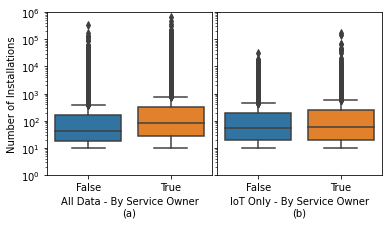

In [3]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(6,3),sharey=True)
ax1.set_yscale("log")
sns.boxplot(x = "by_service_owner",y="installs_count",
            data = Step2_Popular_Rules_df,ax=ax1,palette=['#1f77b4','#ff7f0e'])
ax1.set(ylabel='Number of Installations', xlabel = "All Data - By Service Owner\n(a)")
ax1.set_ylim([1,1000000])  

ax2.set_yscale("log")
sns.boxplot(x = "by_service_owner",y="installs_count",
            data = Step3_IoT_Rules_df,ax=ax2,palette=['#1f77b4','#ff7f0e'])
ax2.set(xlabel = "IoT Only - By Service Owner\n(b)",ylabel = "")
plt.subplots_adjust(wspace=0.03, hspace=0)

# Installations for Recipes Involving IoT Devices (Fig. 3) 
(IFTTT Defined Category)

In [4]:
source_list = []
target_list = []
value_dict = {}
value_list = []
for index,row in Step3_IoT_Rules_df.iterrows():
    arr = list(set(ast.literal_eval(row["actions_category"])))
    for each_action in arr:
        if each_action =="Location":
            print(index)
        pair = (row["triggers_category"], 
                each_action)
        if pair in value_dict.keys():
            value_list[value_dict[pair]] += row["installs_count"]
        else:
            source_list.append(pair[0])
            target_list.append(pair[1])
            value_list.append(row["installs_count"])
            value_dict[pair] = len(value_list) - 1

In [5]:
heat_map_df = pd.DataFrame({ 'Trigger': source_list, 'Action':target_list,'Count': value_list})
heat_map_df = heat_map_df.pivot("Trigger", "Action", "Count")
heat_map_df = heat_map_df.fillna(0)
count_data = heat_map_df.sum().sort_values(ascending = False)

keys = ['Lighting', 'Environment control&\nmonitoring', 'Smart hubs &\nsystems',
       'Security &\nmonitoring systems', 'Appliances', 'Gardening',
       'Power monitoring &\nmanagement', 'Health &\nfitness', 'DIY electronics',
       'Blinds', 'Routers &\ncomputer accessories', 'Television & cable']

In [6]:
count_data

Action
Lighting                            1249927.0
Environment control & monitoring     211910.0
Smart hubs & systems                 182405.0
Security & monitoring systems        142853.0
Appliances                            66230.0
Gardening                             48414.0
Power monitoring & management         31851.0
Health & fitness                      24858.0
DIY electronics                        7690.0
Blinds                                 6946.0
Routers & computer accessories         6155.0
Television & cable                     1295.0
dtype: float64

(1, 5000000)

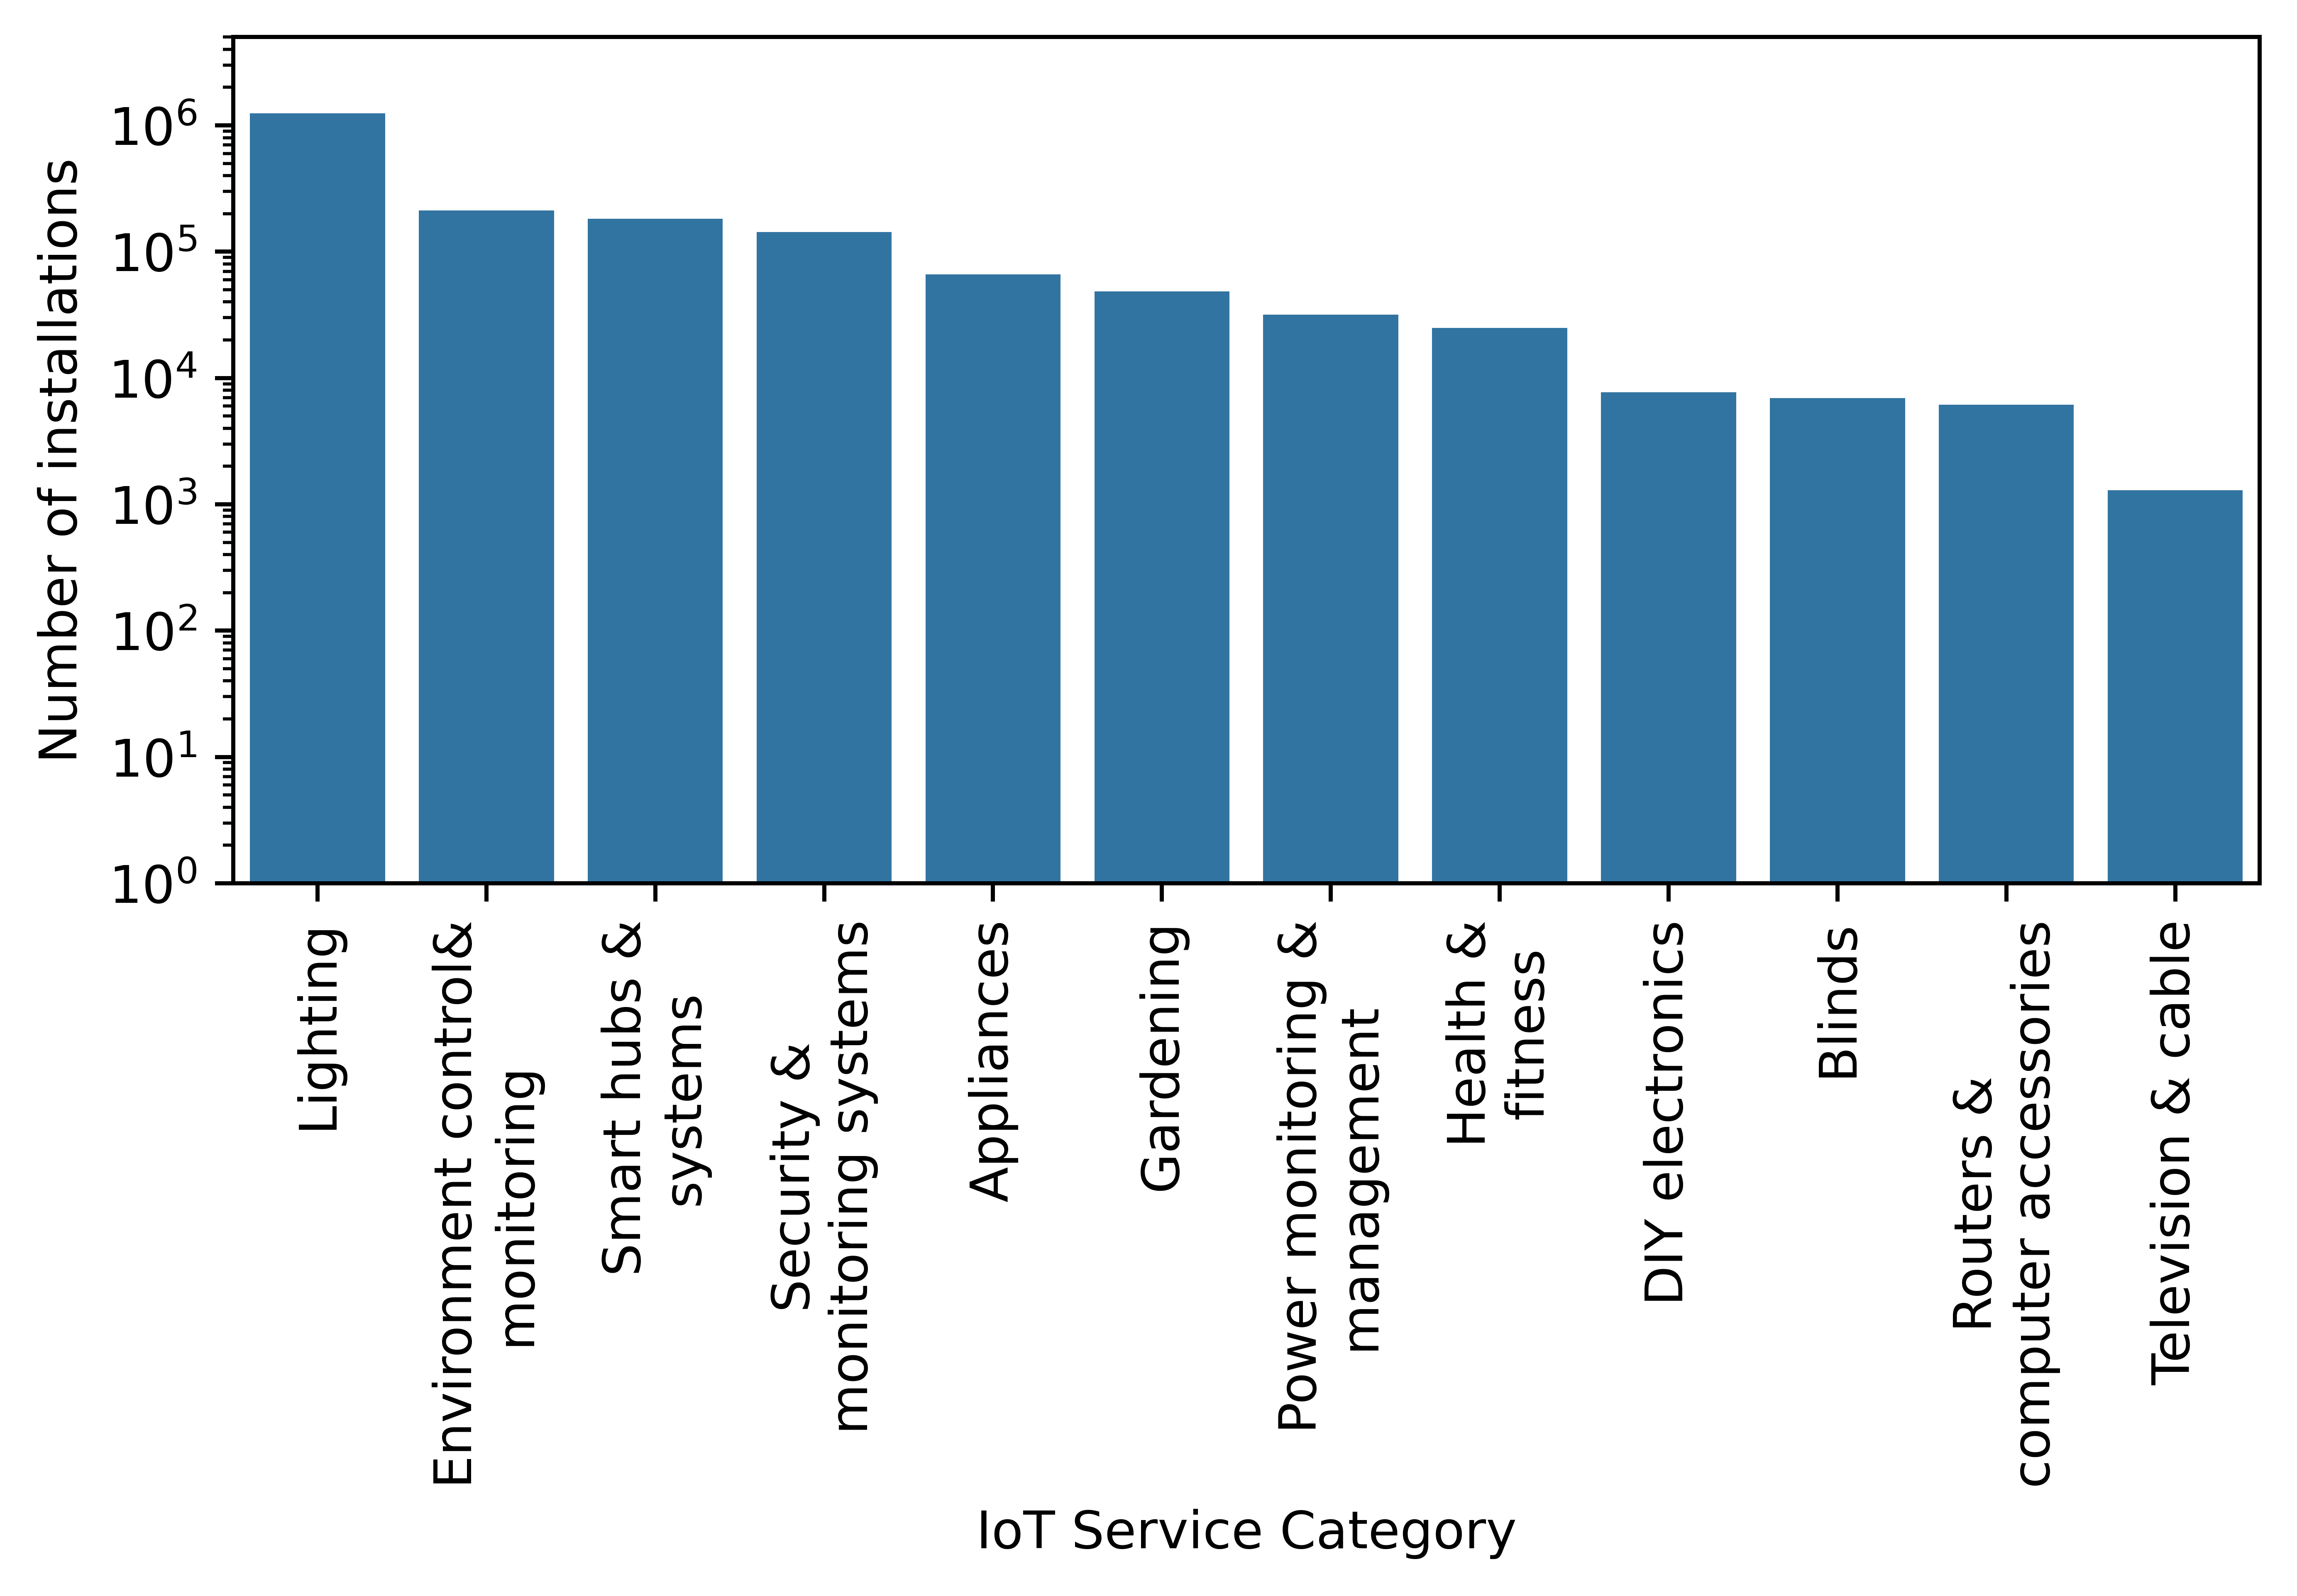

In [7]:
f, ax = plt.subplots(figsize=(7,3),dpi = 900)
ax.set_yscale("log")
sns.barplot(count_data.index,count_data,color='#1f77b4')
ax.set(ylabel='Number of installations',xlabel = "IoT Service Category")
ax.set_xticklabels(keys,rotation=90);
ax.set_ylim([1,5000000])  

## Addtional Figure to represent the relationship between Triggers and Actions

In [8]:
heat_map_df_percentage = (100. * heat_map_df / heat_map_df.sum()).round(2)

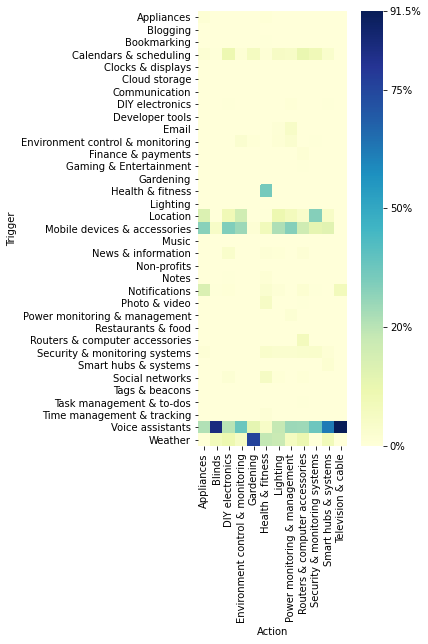

In [9]:
plt.figure(figsize=(5,8))
ax = sns.heatmap(heat_map_df_percentage.drop(index="Not Found"),square=True ,cmap="YlGnBu")
cbar = ax.collections[0].colorbar
cbar.set_ticks([0,25, 50, 75, 91.5,100])
cbar.set_ticklabels(['0%',"20%", '50%', '75%',"91.5%", '100%'])

# Frequencies for the number of services per recipe (Fig. 4)

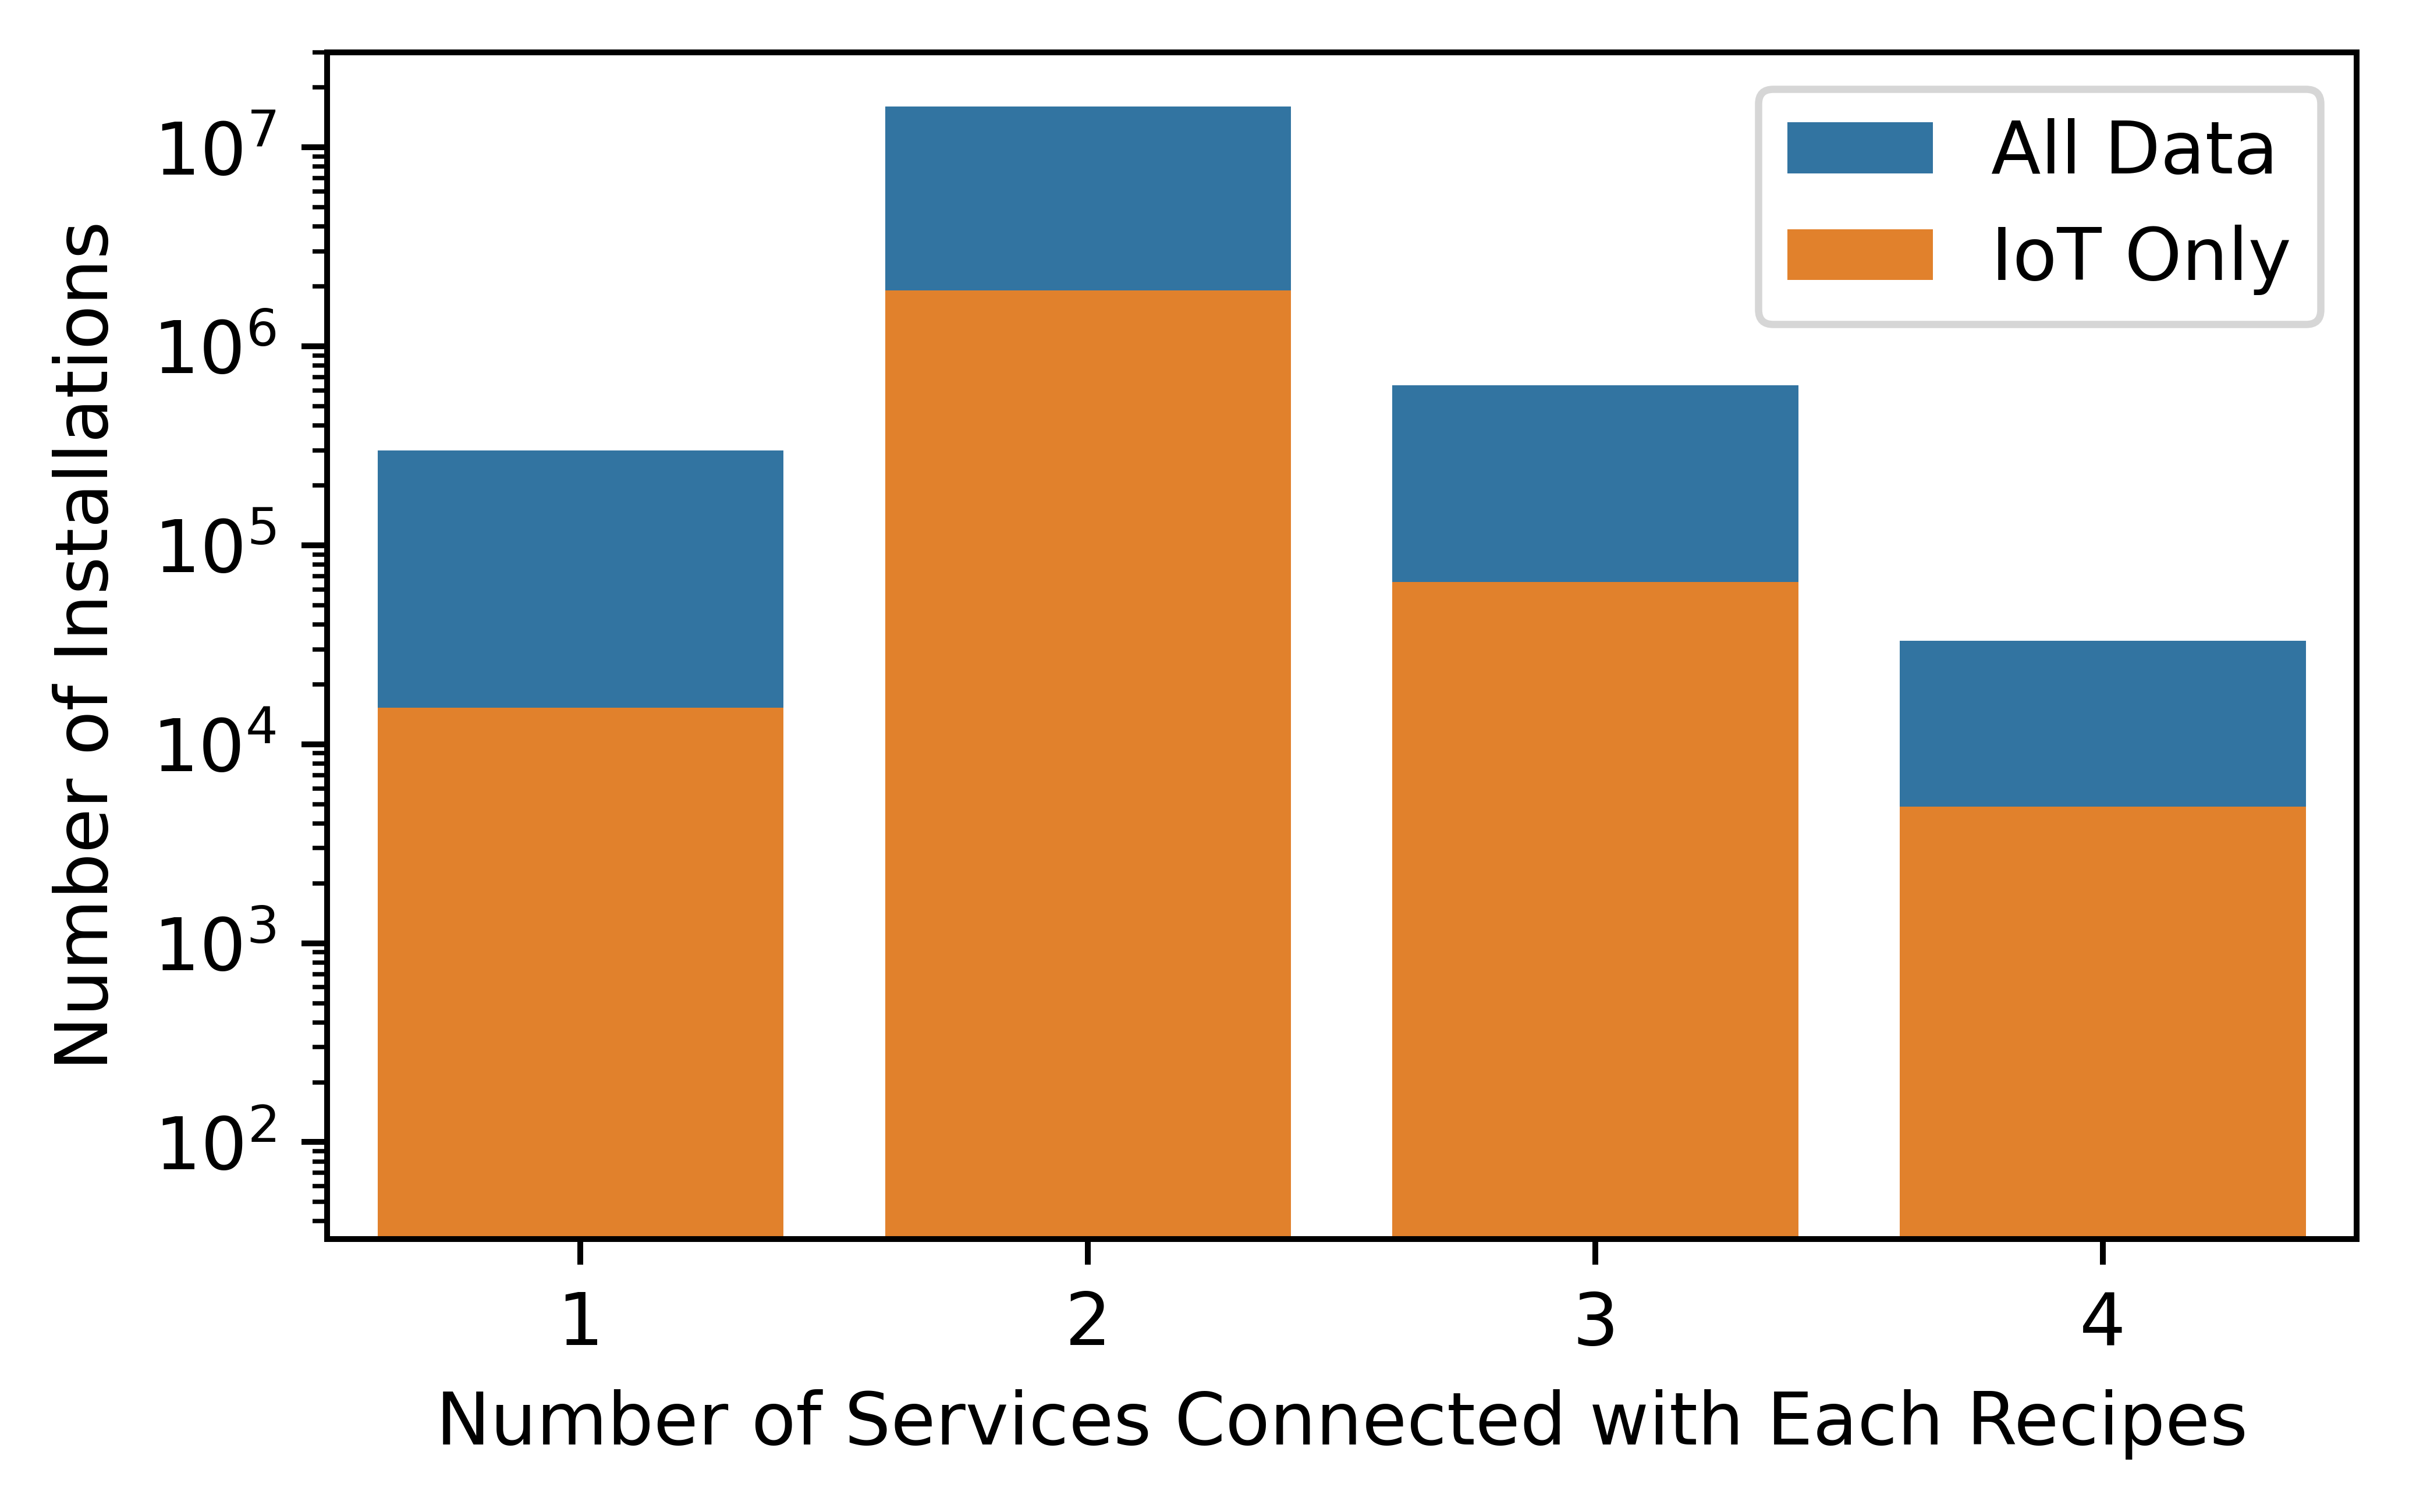

In [10]:
plt.figure(figsize=(5,3),dpi = 900)
sns.barplot(Step2_Popular_Rules_df.groupby(["services_len"]).sum()["installs_count"].index,
       list(Step2_Popular_Rules_df.groupby(["services_len"]).sum()["installs_count"]),label = "All Data",
        color = "#1f77b4")

sns.barplot(Step3_IoT_Rules_df.groupby(["services_len"]).sum()["installs_count"].index,
       list(Step3_IoT_Rules_df.groupby(["services_len"]).sum()["installs_count"]),label = "IoT Only",
       color = "#ff7f0e")

plt.yscale("log")
plt.xlabel("Number of Services Connected with Each Recipes")
plt.ylabel("Number of Installations")
plt.legend()

# Percentage of each trigger with each category (Fig 5)
(Author Defined Category)

In [11]:
heat_map_sum = dict(Step4_Single_Trigger_IoT_Rules_df.groupby(["goal","operation"]).sum()["installs_count"])

In [12]:
goal_list = ['Ambient Temperature', 'Ambient Luminance',
 'Security', 'Alert User', 'Energy Saving',
 'Ambient Atmosphere', 'Robot Control',
 'Control Hub', 'Gardening',
 'Outlet Control', 'Other Appliances', 'Other']

op_list = ["Explicit Control (Voice)","Explicit Control (Button)",
    "Spatial Trigger","Time Trigger",
    "Weather Trigger","Other Trigger"]

In [13]:
heat_map_matrix = np.zeros((12,6))
for key in heat_map_sum.keys():
    arr = ast.literal_eval(key[0])
    for i in arr:
        heat_map_matrix[goal_list.index(i),op_list.index(key[1])] += heat_map_sum[key]

In [14]:
heat_map_df = pd.DataFrame(heat_map_matrix,columns=["Explicit Control\n(Voice)","Explicit Control\n(Button)",
                                      "Spatial Trigger","Time Trigger",
                                      "Weather Trigger","Other Trigger"],
                          index =  ["Ambient Temperature\n[359 | 206,466]","Ambient Luminance\n[639 | 762,153]",
                    "Security\n[360 | 154,265]", "Alert User\n[283 | 157,589]", "Energy Saving\n[42 | 33,638]", 
                                    "Ambient Atmosphere\n[248 | 314,950]",
                    "Robot Control\n[94 | 94,418]","Control Hub\n[200 | 158,962]","Gardening\n[27 | 4,203]",
                    "Outlet Control\n[45 | 4,986]","Other Appliances\n[103 | 29,607]","Other\n[358 | 52,274]"])
heat_map_df.loc["Total\n[# Rules | # Installations]"] = heat_map_df.sum()

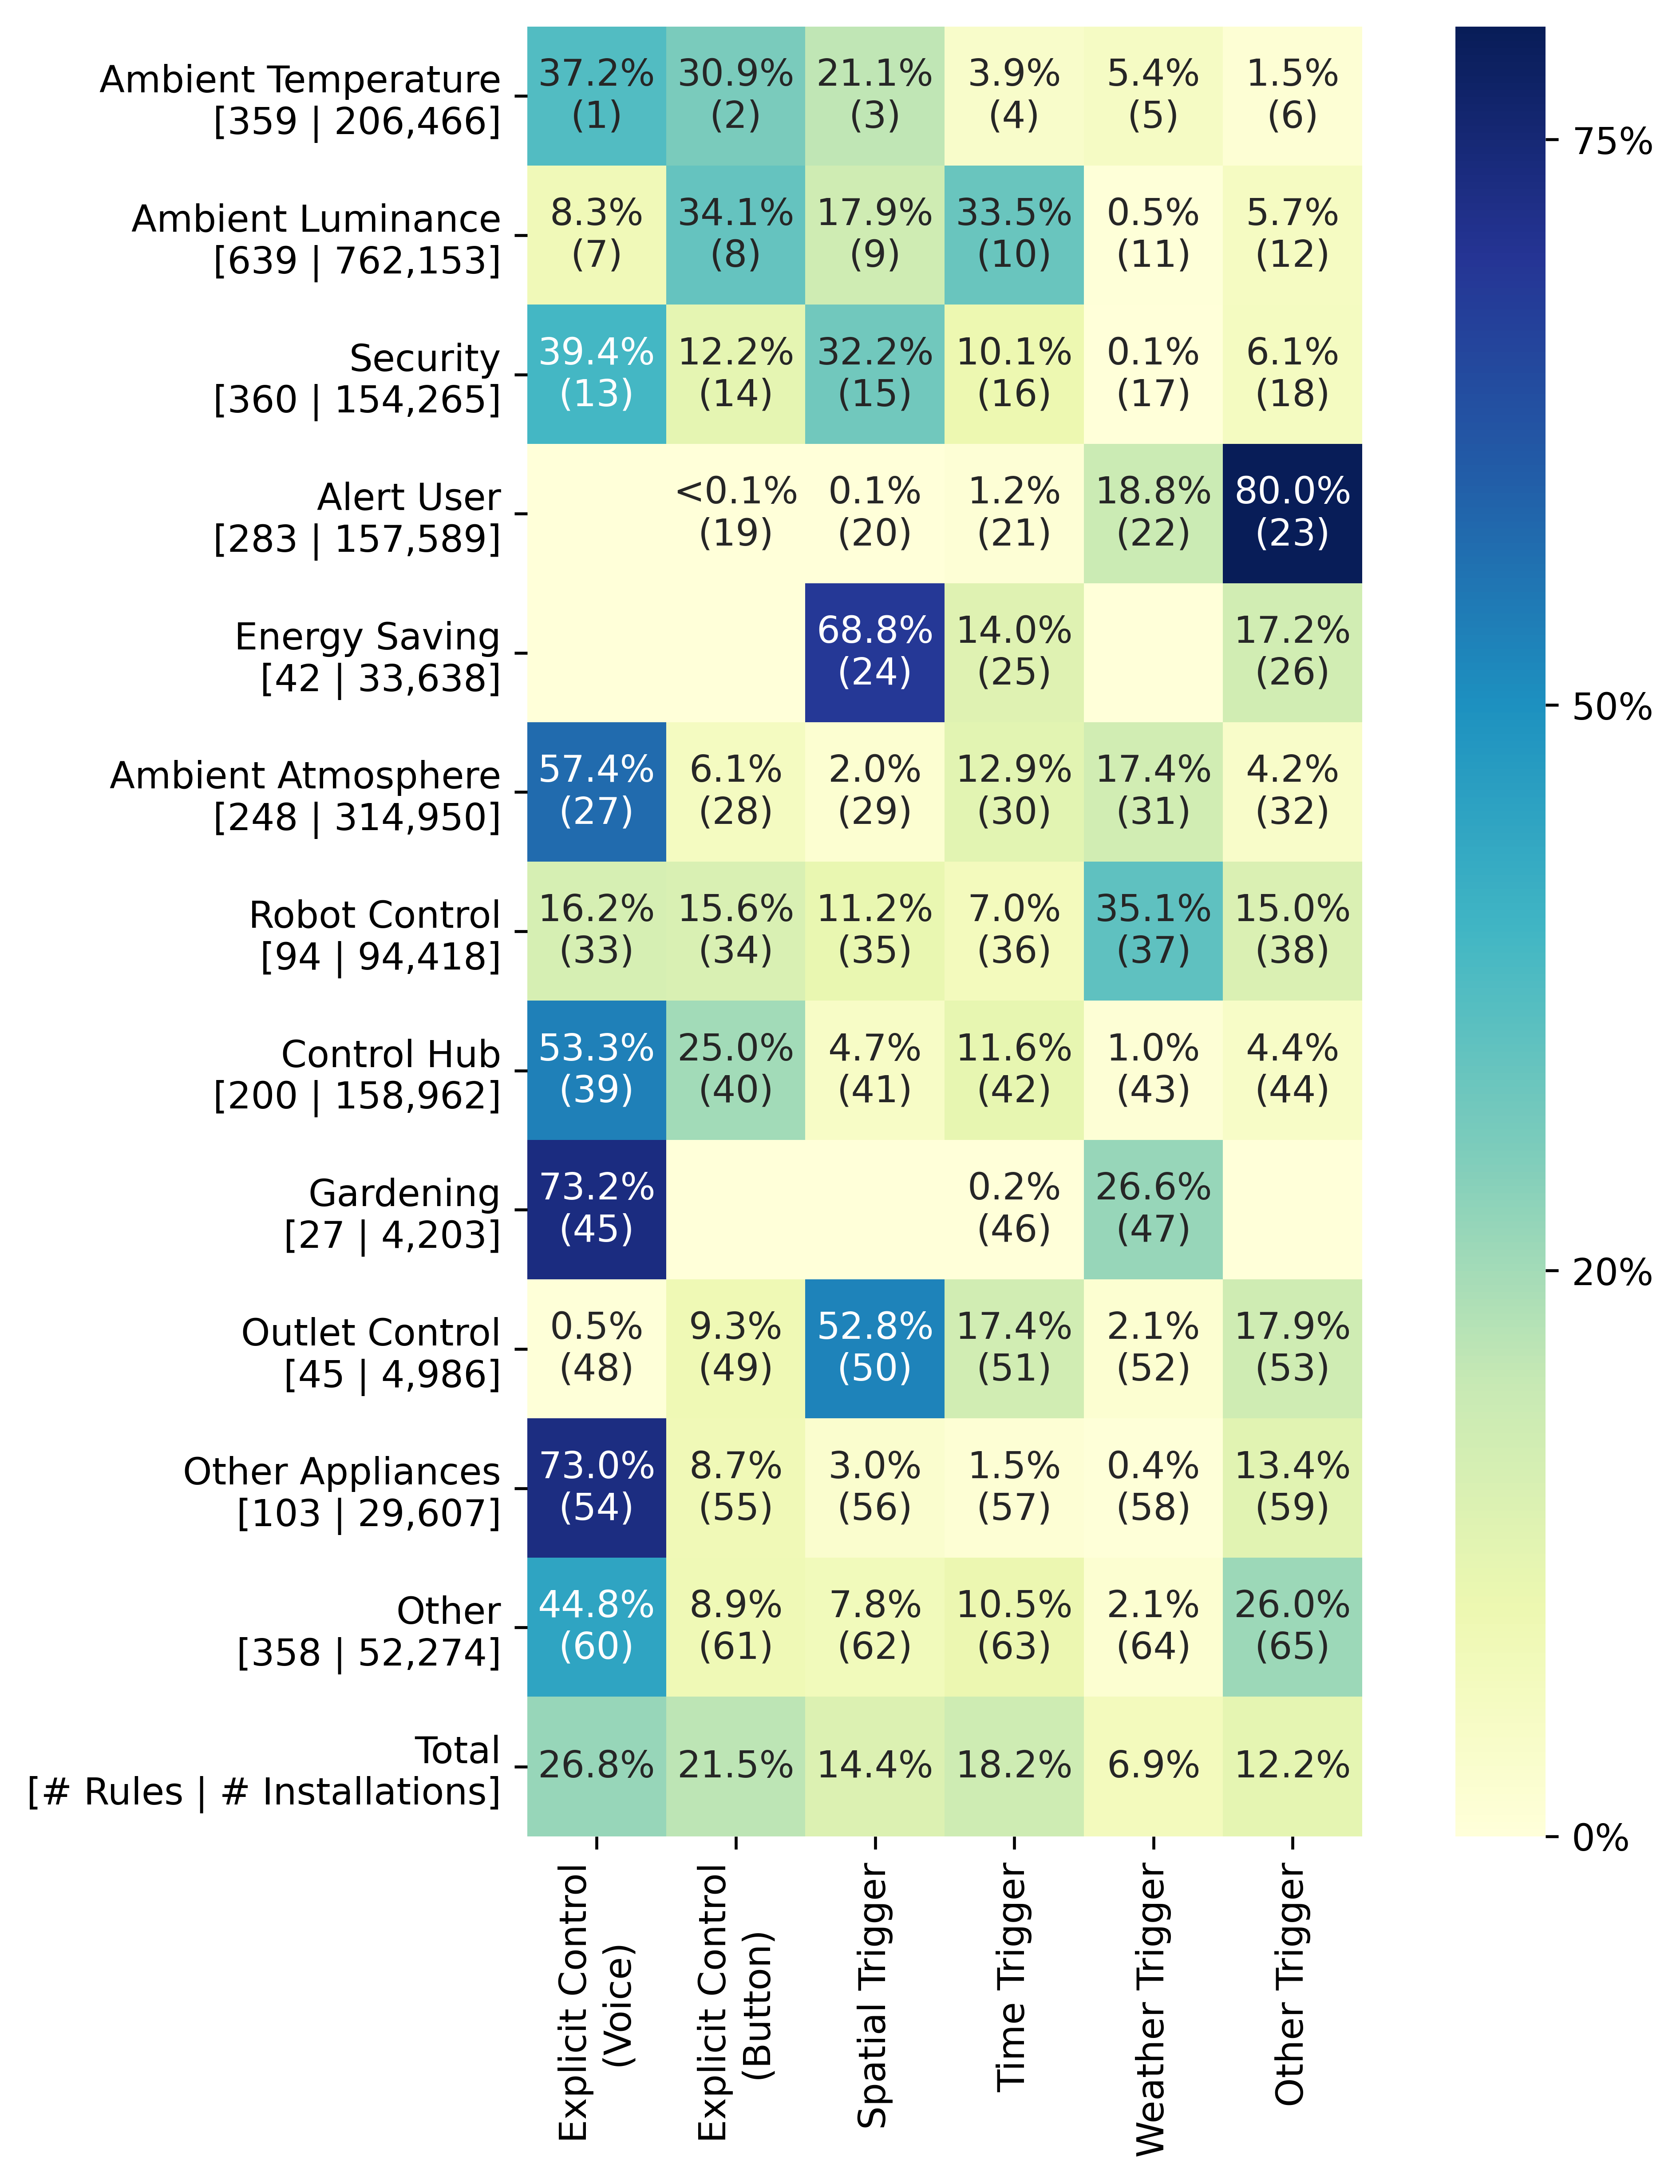

In [15]:
plt.figure(figsize=(9,9),dpi=600)
ax = sns.heatmap(heat_map_df.div(heat_map_df.sum(axis=1), axis=0).applymap(lambda x:x*100).round(1),
            square=True ,cmap="YlGnBu",annot=True,fmt = '.1f')
number_count = 1
cell_count = 1
for t in ax.texts: 
    if number_count>=66:
        t.set_text(t.get_text() + "%")
    else:
        if t.get_text() != "0.0":
            t.set_text(t.get_text() + "%\n("+str(number_count)+")")
            number_count += 1
        else:
            if cell_count==20:
                t.set_text("<0.1%\n("+str(number_count)+")")
                number_count += 1
            else:
                t.set_text("")
    cell_count = cell_count + 1
        
cbar = ax.collections[0].colorbar
cbar.set_ticks([0,25, 50, 75,])
cbar.set_ticklabels(['0%',"20%", '50%', '75%'])

# Exactly number of installations for each category

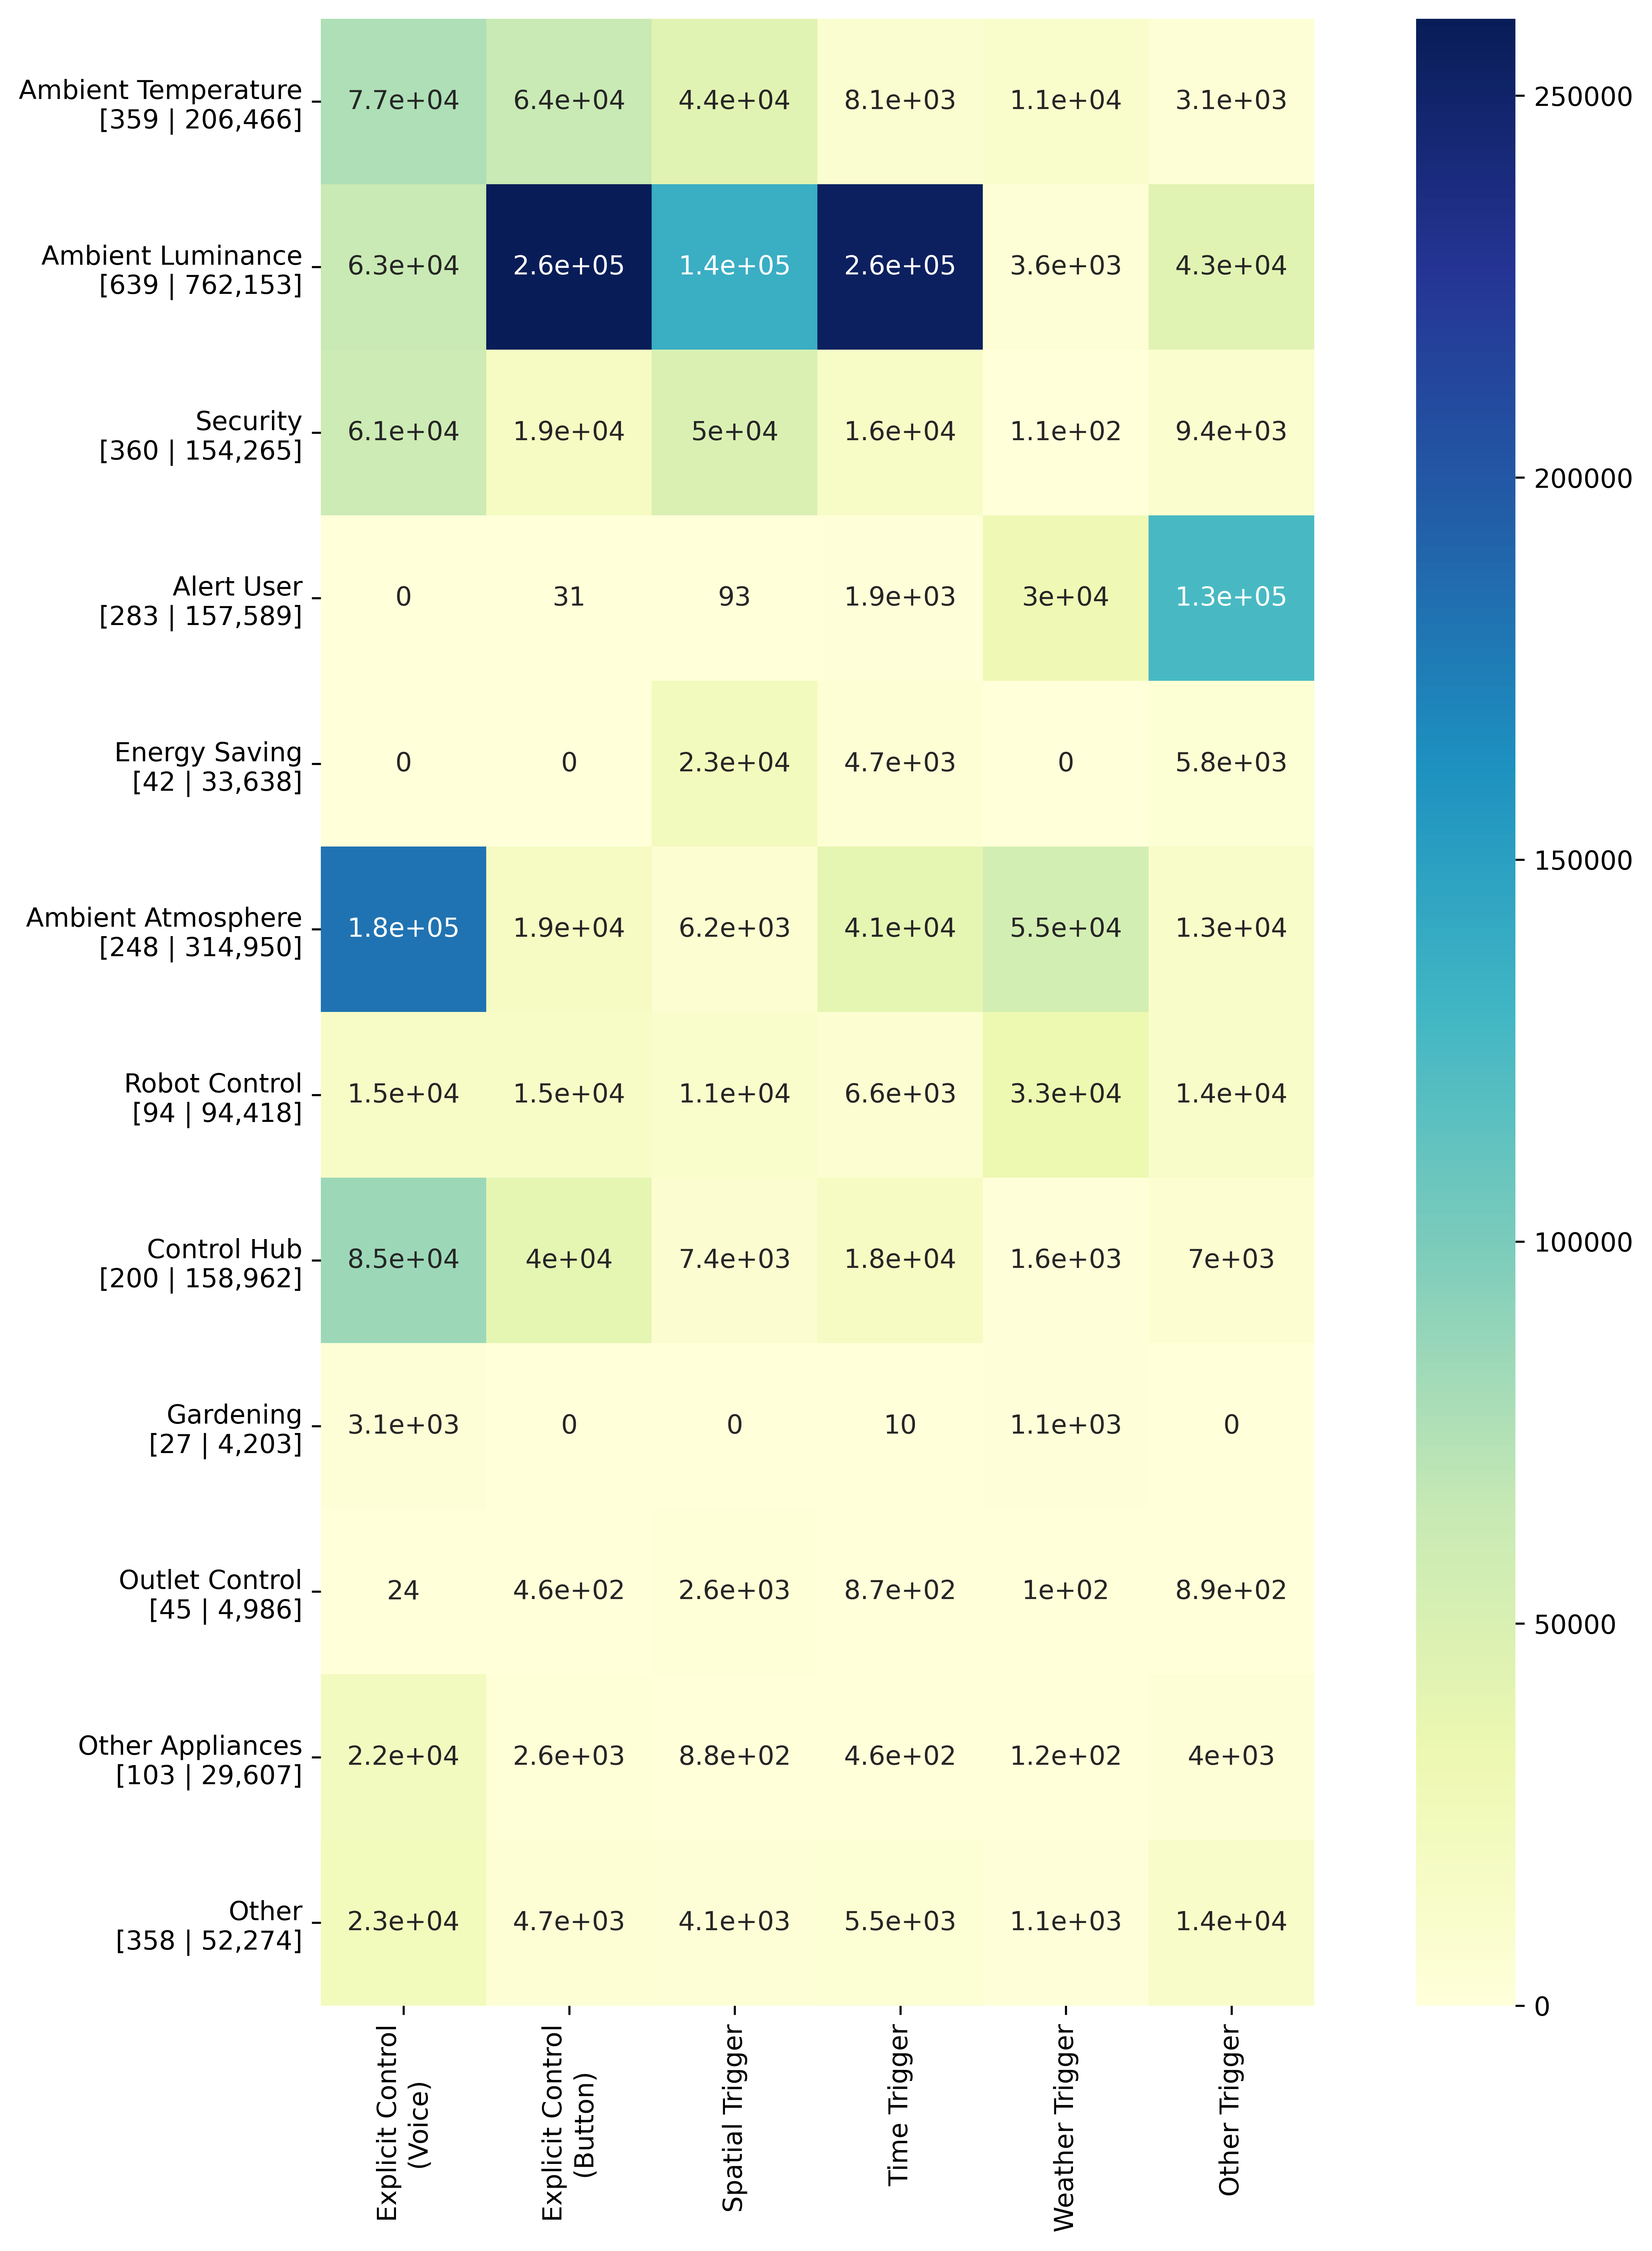

In [16]:
plt.figure(figsize=(14,14),dpi=600)
ax = sns.heatmap(heat_map_df.drop(index = "Total\n[# Rules | # Installations]"),
            square=True ,cmap="YlGnBu",annot=True)

# Sankey Figure:  the relationship between triggers' products and actions' products (Using Lighting as an example)
(From Step 4 Data)

In [17]:
tempDF = Step4_Single_Trigger_IoT_Rules_df[(Step4_Single_Trigger_IoT_Rules_df["actions_category"]=="Lighting")&
                                    (Step4_Single_Trigger_IoT_Rules_df["triggers_category"]!="Not Found")]

In [18]:
color_list = []
cmap = cm.get_cmap('tab20b')

for i in range(max(20,cmap.N)):
    color_list.append(matplotlib.colors.rgb2hex(cmap(i)))
    
cmap = cm.get_cmap('tab20c')

for i in range(cmap.N):
    color_list.append(matplotlib.colors.rgb2hex(cmap(i)))

    
tempDF = Step4_Single_Trigger_IoT_Rules_df[(Step4_Single_Trigger_IoT_Rules_df["actions_category"]=="Lighting")&
                                    (Step4_Single_Trigger_IoT_Rules_df["triggers_category"]!="Not Found")]

color_map = {}
cat_list = list(set(tempDF["triggers_category"]))
for key_i in range(0,len(cat_list)):
    color_map[cat_list[key_i]] = color_list[key_i]
    
    
label_list = list(set(list(tempDF["service_triggers"]) + 
                      list(tempDF["service_actions"])))

color_list = list(map(lambda x: color_map[service_with_categories[x]], label_list))

source_list = []
target_list = []
value_dict = {}
value_list = []
total_install_counts = 0
for _,row in tempDF.iterrows():
    pair = (label_list.index(row["service_triggers"]), 
            label_list.index(row["service_actions"])+len(label_list))
        
    if pair in value_dict.keys():
        value_list[value_dict[pair]] += row["installs_count"]
    else:
        source_list.append(pair[0])
        target_list.append(pair[1])
        value_list.append(row["installs_count"])
        value_dict[pair] = len(value_list) - 1
        
zipped_lists = zip(value_list, source_list, target_list )
sorted_pairs = sorted(zipped_lists,reverse=True)

tuples = zip(*sorted_pairs)
value_list, source_list, target_list = [ list(tuple) for tuple in  tuples]

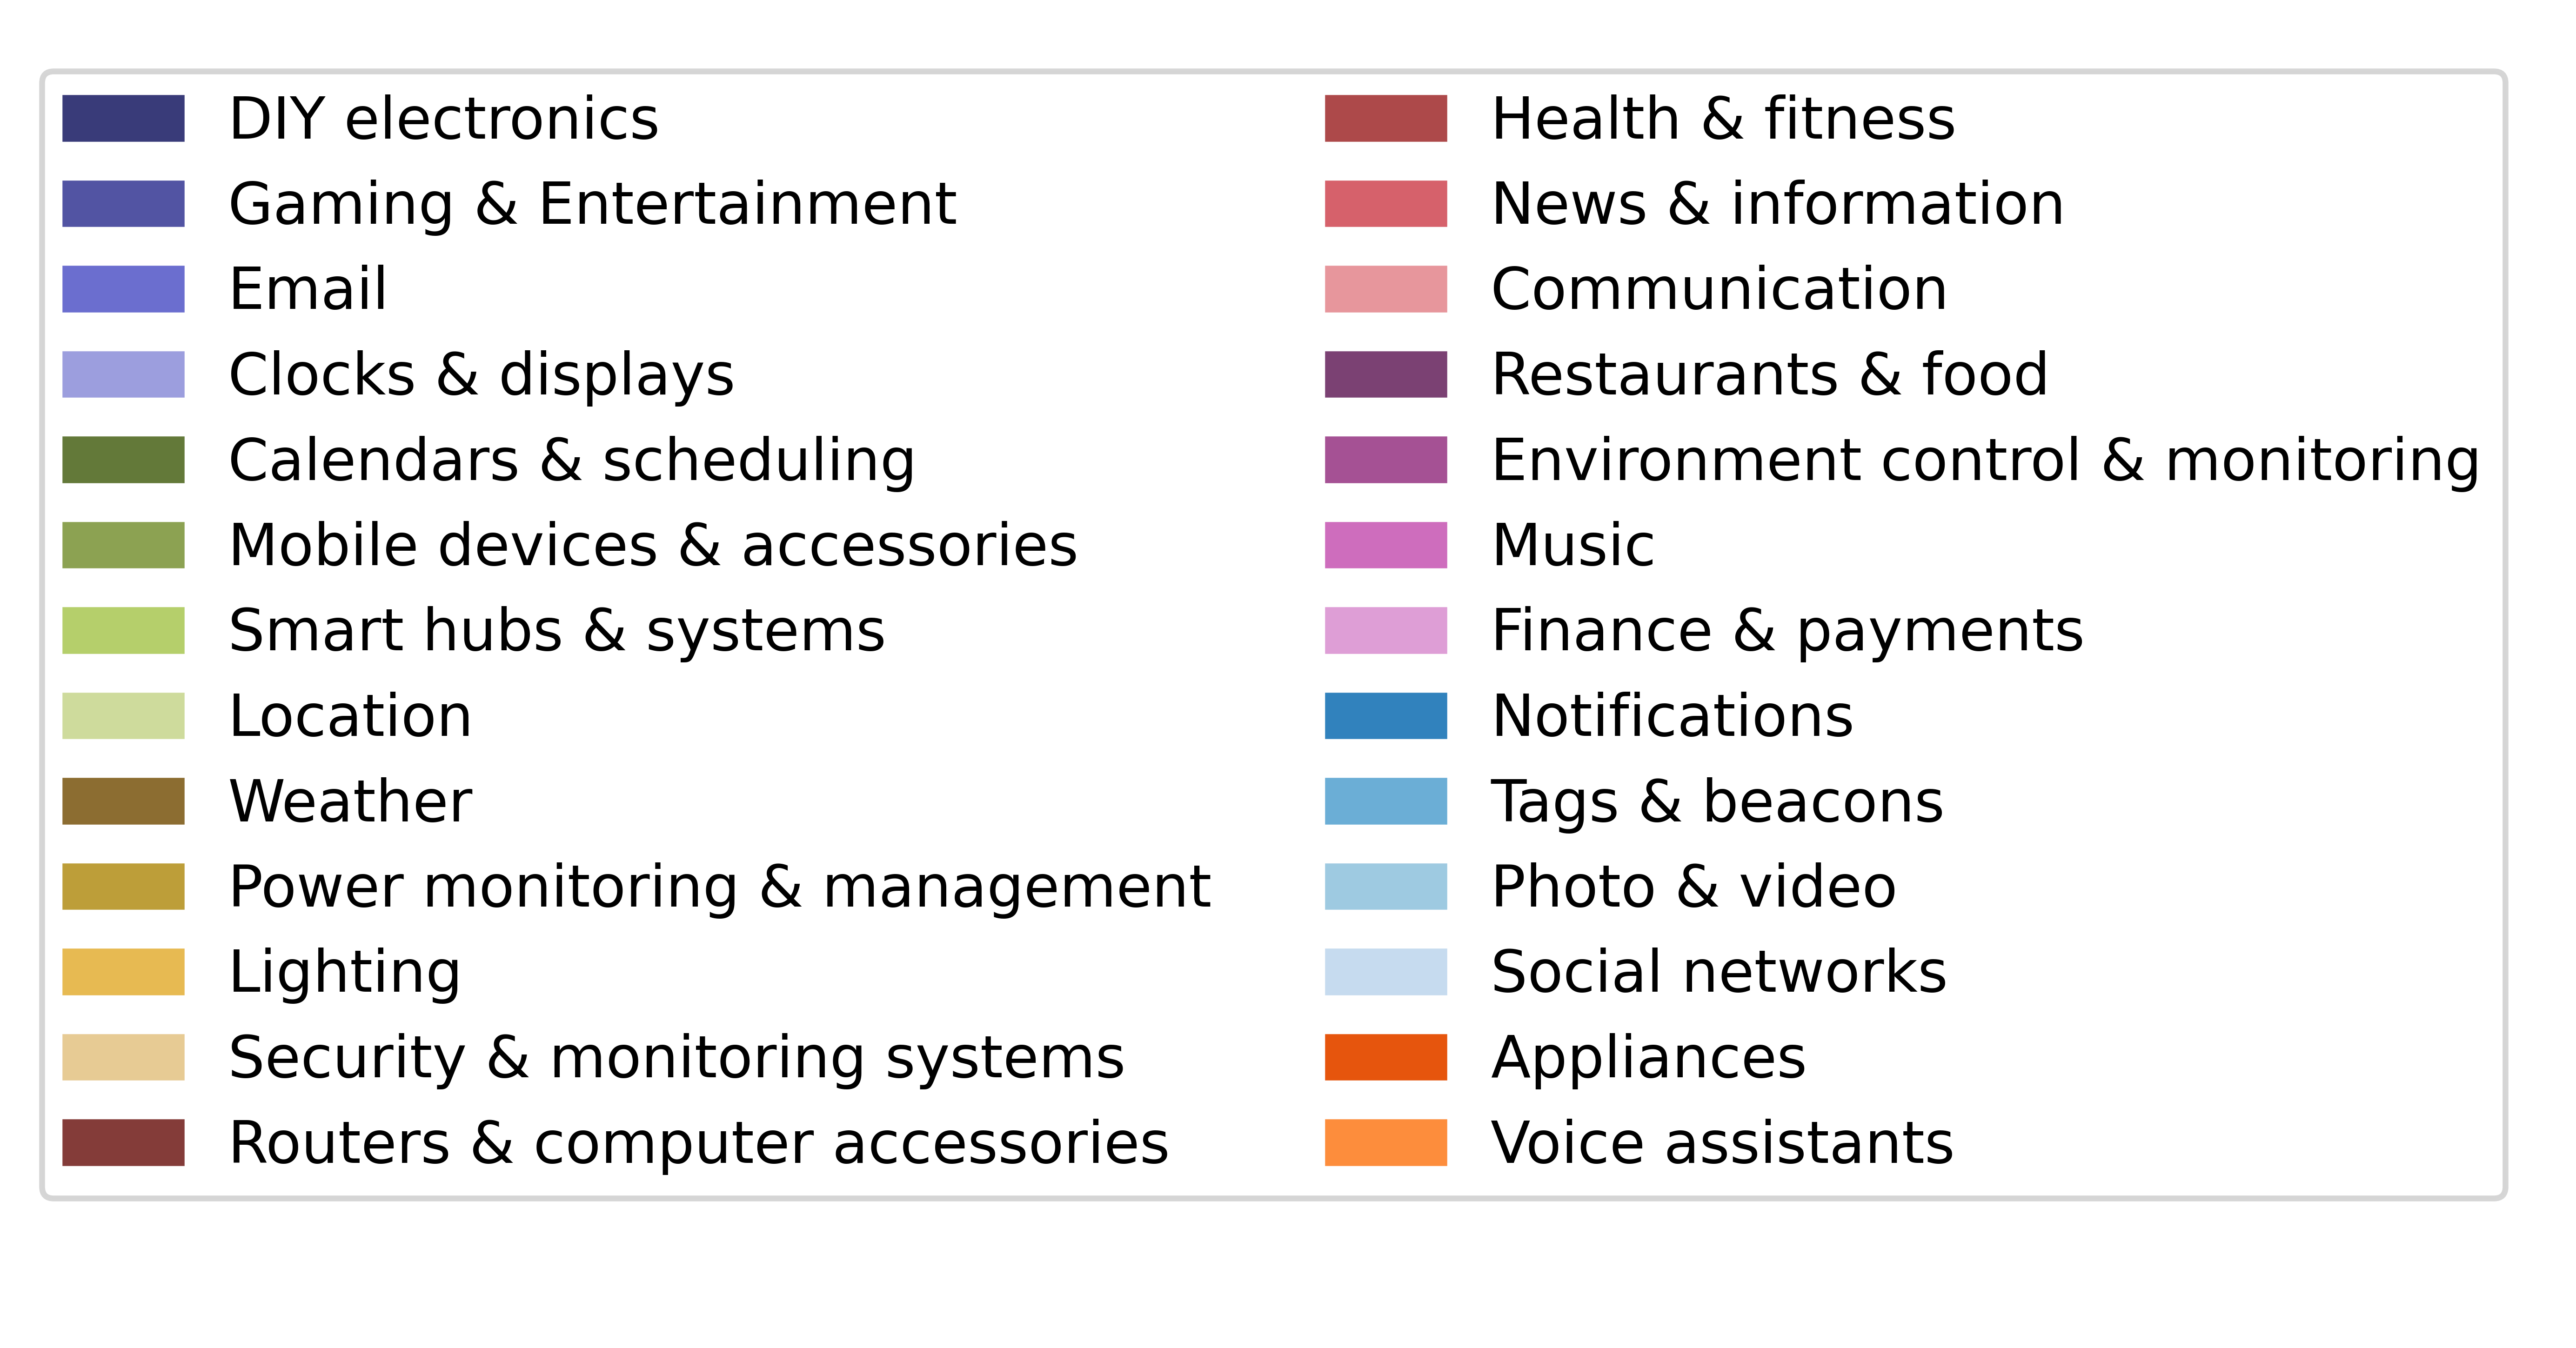

In [19]:
plt.figure(dpi = 900)
patch_list = []
for key in color_map.keys():
    patch_list.append(mpatches.Patch(color=color_map[key], label=key))
plt.axis('off')
plt.legend(handles=patch_list,ncol=2,)

In [20]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = label_list+label_list,
      color = color_list + color_list
    ),
    link = dict(
      source = source_list[:40],
      target = target_list[:40],
      value = value_list[:40],
  ))])

fig.update_layout(title_text="", font_size=15)
fig.show()